# Neural Networks: Intuition, Math, Activations & More

---

## 1. Intuition

A neural network is a computational model inspired by the human brain. It consists of layers of **neurons (nodes)** connected via **weights**:

- **Input layer**: receives raw features  
- **Hidden layers**: transform inputs into increasingly abstract representations  
- **Output layer**: produces final prediction (regression or classification)

Each connection has a weight $w$, and each neuron adds a **bias** $b$. A neuron computes a weighted sum of its inputs, applies an **activation function**, and passes the result forward.

![Neural Network Diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/640px-Colored_neural_network.svg.png)

---

## 2. Forward Pass Math

For layer $l$, with inputs $a^{[l-1]}$, weights $W^{[l]}$, and biases $b^{[l]}$, the neuron computes:

$$
z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}
$$

The activation output is:

$$
a^{[l]} = \phi(z^{[l]})
$$

Common activations:

- **Sigmoid**: $\phi(z) = \frac{1}{1 + e^{-z}}$ — squashes to (0,1)  
- **Tanh**: $\phi(z) = \tanh(z)$ — squashes to (–1,1)  
- **ReLU**: $\phi(z) = \max(0, z)$ — sparse activation  
- **Leaky ReLU**, **ELU**, **GELU**, etc.

---

## 3. Why Activation Functions?

Without non-linear activations, multiple layers collapse to a single linear transformation. Activations introduce **non-linearity**, enabling networks to approximate complex functions.

Neural networks using non-linear activations are **universal function approximators** when they have enough neurons (Universal Approximation Theorem).

---

## 4. Training: Backpropagation & Gradient Descent

Assume a loss function $L(\hat{y}, y)$, e.g., mean squared error or cross-entropy.

### Chain rule for gradients:

$$
\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial z^{[l]}} \cdot (a^{[l-1]})^\top
$$
$$
\frac{\partial L}{\partial b^{[l]}} = \frac{\partial L}{\partial z^{[l]}}
$$

Backpropagated error:

$$
\delta^{[l]} = (W^{[l+1]})^\top \, \delta^{[l+1]} \odot \phi'(z^{[l]})
$$

where $\odot$ is element-wise multiplication.

Parameters are updated via:

$$
W^{[l]} \leftarrow W^{[l]} - \eta \frac{\partial L}{\partial W^{[l]}}
$$
$$
b^{[l]} \leftarrow b^{[l]} - \eta \frac{\partial L}{\partial b^{[l]}}
$$

with learning rate $\eta$.

---

## 5. Common Activation Functions

| Activation    | Formula                                   | Properties |
|---------------|-------------------------------------------|------------|
| Sigmoid       | $\frac{1}{1 + e^{-z}}$                    | Smooth, saturates at extremes |
| Tanh          | $\tanh(z)$                                | Zero-centered, but saturates |
| ReLU          | $\max(0, z)$                              | Fast, sparse, suffers “dying ReLU” |
| Leaky ReLU    | $\max(\alpha z, z)$                       | Allows small negative output |
| Softmax (output) | $\frac{e^{z_i}}{\sum_j e^{z_j}}$        | For multi-class probabilistic output |


![Activation Functions](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKiFKcSK_lPDVEn3JHP4sLxK5h5qEf_euyfg&s)

---

## 6. Weight Initialization

Proper initialization prevents **vanishing/exploding gradients**. Common schemes:

- **Xavier/Glorot**: for sigmoids/tanh  
- **He initialization**: for ReLU

---

## 7. Regularization

To prevent over-fitting:
- **Dropout**: randomly deactivate neurons during training  
- **L2 / L1 weight penalties**  
- **Batch normalization**: stabilizes activations across layers

---

## 8. Architectures & Use Cases

- **Feedforward network**: general-purpose  
- **Convolutional Neural Network (CNN)**: images  
- **Recurrent Neural Network (RNN)/LSTM/Transformer**: sequences  
- **Autoencoders**: compression, denoising  
- **GANs**: generative modeling

Neural networks excel in tasks like image classification, NLP, time-series forecasting, and more.

---

## 9. Theoretical Insight

- **Universal Approximation Theorem**: Networks with at least one hidden layer and non-linear activation can approximate any continuous function given enough neurons.
- Depth and width have tradeoffs — deeper models can represent some functions more compactly.

---

## 10. Summary

- Neural networks simulate adaptive systems with layers of weighted connections and biases.
- Forward pass uses activations for non-linearity.
- Backpropagation applies the chain rule to adjust weights based on error.
- Activation choice, initialization, regularization, and architecture crucially affect performance.


# Application to Bank Churn Data
- We use this same data for multiple modeling tasks but it's helpful in identifying the strengths and weaknesses of algorithms.
- We will start with some straightforward EDA

| **Feature**                | **Description**                                                                    |
| -------------------------- | ---------------------------------------------------------------------------------- |
| **Surname**                | Customer’s last name (used for TF-IDF features).                                   |
| **CreditScore**            | Numeric credit score reflecting financial reliability.                             |
| **Age**                    | Customer’s age in years.                                                           |
| **Tenure**                 | Number of years the customer has been with the bank.                               |
| **Balance**                | Account balance in local currency.                                                 |
| **NumOfProducts**          | Number of bank products held (e.g., credit cards, loans).                          |
| **HasCrCard**              | Binary flag indicating if the customer has a credit card (1 = yes).                |
| **IsActiveMember**         | Binary indicator of whether the customer is active (1 = yes).                      |
| **EstimatedSalary**        | Estimated annual income.                                                           |
| **Exited**                 | Target variable — 1 if the customer left the bank, 0 otherwise.                    |
| **Surname_tfidf_0–4**      | Numerical text features from surname TF-IDF encoding (top 5 components).           |
| **France, Germany, Spain** | One-hot encoded country of residence.                                              |
| **Female, Male**           | One-hot encoded gender.                                                            |
| **Mem__no__Products**      | Engineered ratio or interaction between membership and products.                   |
| **Cred_Bal_Sal**           | Combined feature capturing relationship between credit score, balance, and salary. |
| **Bal_sal**                | Ratio of balance to salary.                                                        |
| **Tenure_Age**             | Interaction term between tenure and age.                                           |
| **Age_Tenure_product**     | Product of age and tenure capturing long-term engagement.                          |

## EDA

In [ ]:
# Standard Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")


# Machine Learning Libraries
from mlpackage import MLP
from mlpackage.preprocess import MinMaxScaler, train_test_split


# Load the dataset
data = pd.read_csv('churn_data.csv')

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [25]:
# Check for missing values
data.isnull().sum()

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

Data is very clean with no missing values

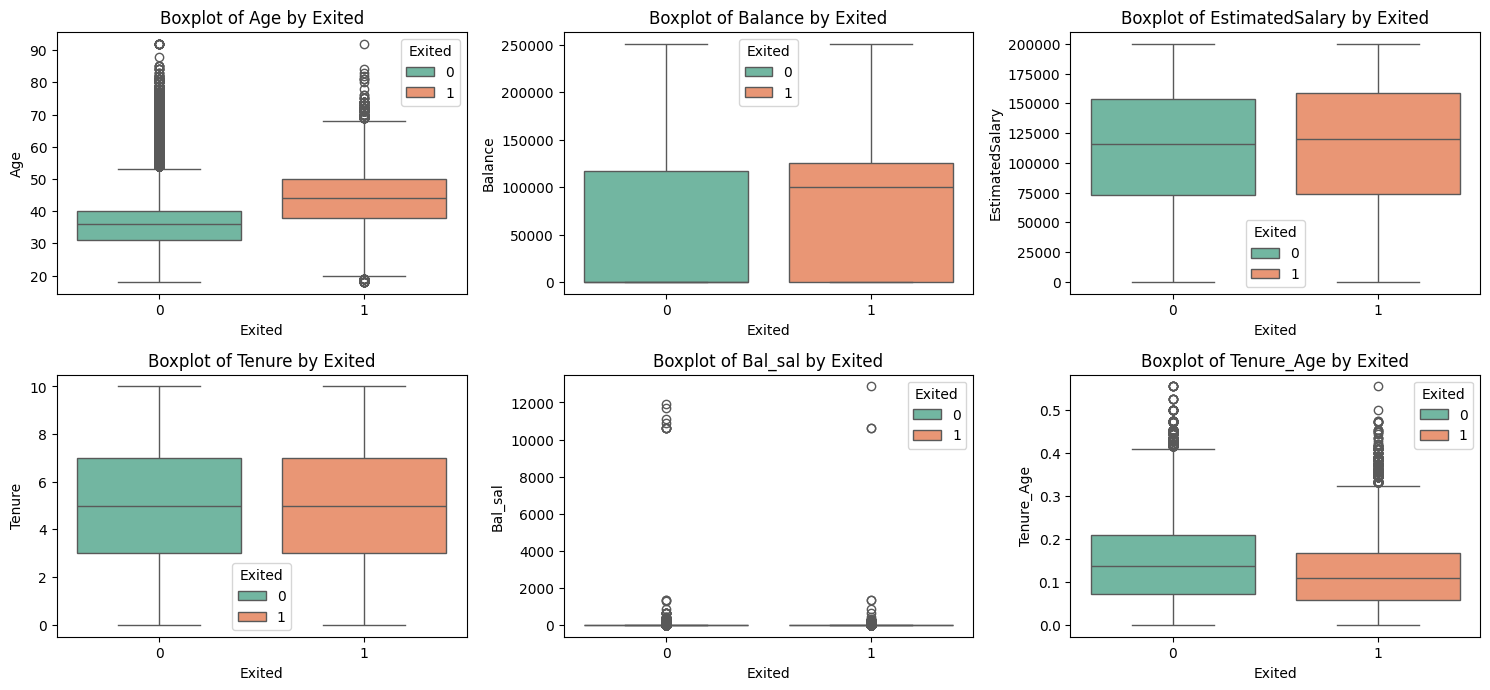

In [26]:
# Side-by-side boxplots of variables depending on churn status
def plot_boxplots(data, columns, target):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=target, y=column, data=data, hue=target, palette='Set2')
        plt.title(f'Boxplot of {column} by {target}')
    plt.tight_layout()
    plt.show()

cols = ['Age', 'Balance', 'EstimatedSalary', 'Tenure', 'Bal_sal', 'Tenure_Age']
plot_boxplots(data, cols, 'Exited')

There aren't many takeaways from these plots, but we see that higher age & tenure age typically makes it more likely to churn.

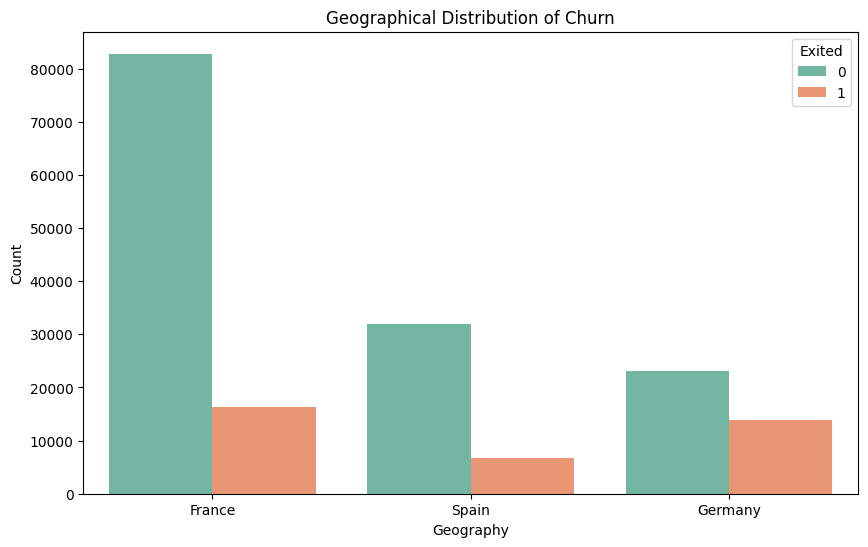

In [27]:
# Let's look at geographical data (Binary cols of France, Germany, Spain)
data['Geography'] = np.where(data['France'] == 1, 'France', np.where(data['Germany'] == 1, 'Germany', np.where(data['Spain'] == 1, 'Spain', 'Other')))
def plot_geographical_distribution(data, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Geography', hue=target, data=data, palette='Set2')
    plt.title('Geographical Distribution of Churn')
    plt.xlabel('Geography')
    plt.ylabel('Count')
    plt.legend(title=target)
    plt.show()



plot_geographical_distribution(data, 'Exited')


We see that the distribution of churn vs. not churn changes based on geography. There are the most people in France but Germany has the highest overall churn rate.

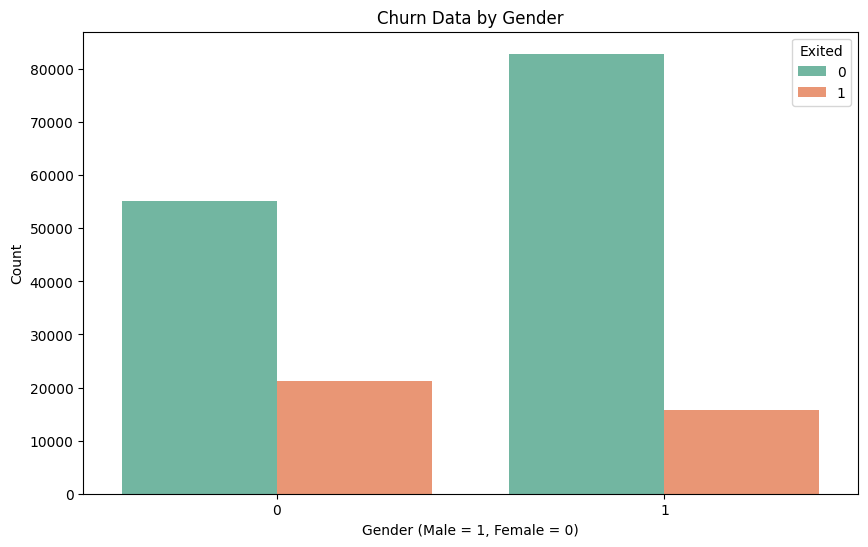

In [28]:
# Let's look at Male vs. Female for churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Male', hue='Exited', data=data, palette='Set2')
plt.title('Churn Data by Gender')
plt.xlabel('Gender (Male = 1, Female = 0)')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()


There are more males in the data but females have a higher churn rate.

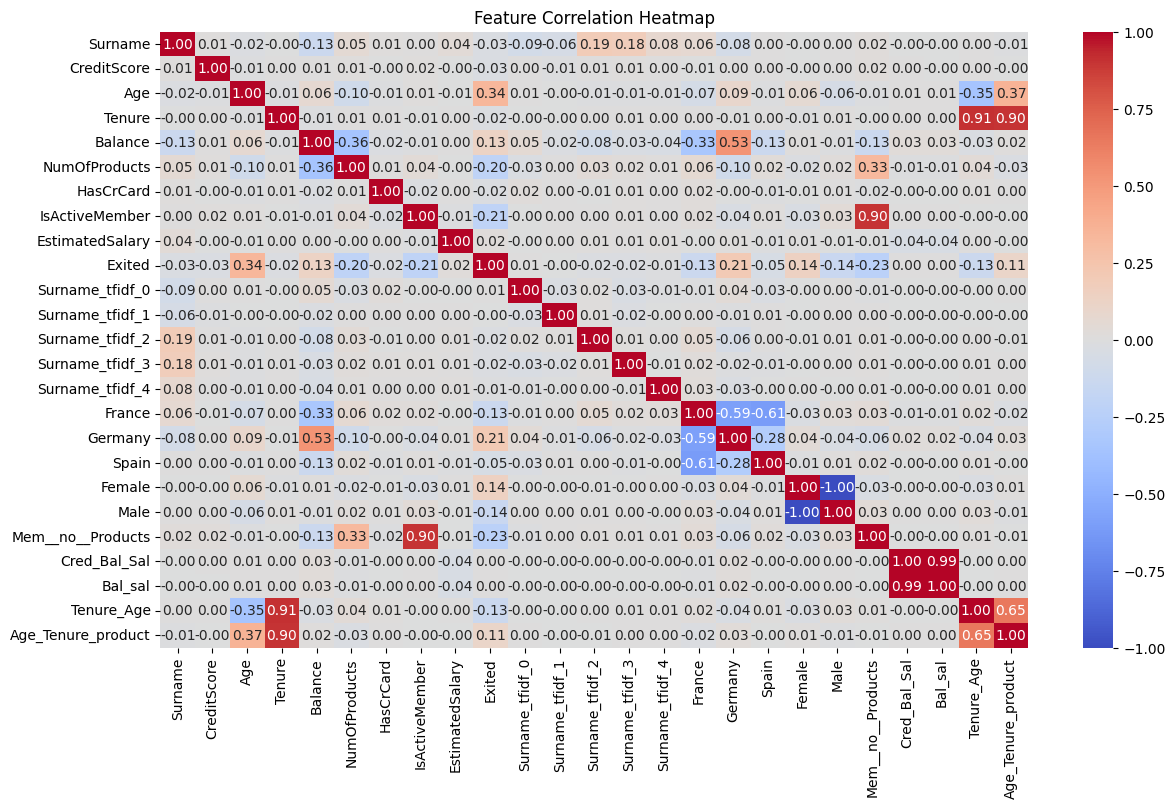

In [29]:
# Prepare the data for modeling
data.drop(columns = ['Geography'], inplace=True) # Drop the Geography column as we have binary columns
# first look at correlations
# Create correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [30]:
# Preprocess data
# Drop all columns with less than a 0.05 correlation with Churn
correlation_threshold = 0.05
drop_columns = [col for col in data.columns if abs(data[col].corr(data['Exited'])) < correlation_threshold]
data.drop(columns=drop_columns, inplace=True)
print(f"Dropped columns due to low correlation with 'Exited': {drop_columns}")
# If two features are highly correlated (>0.8), drop one of them
high_corr_threshold = 0.8
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = set()
for col in upper.columns:
    # Find any feature that is correlated above threshold with this one
    high_corr = [row for row in upper.index if upper.loc[row, col] > high_corr_threshold]
    if high_corr:
        to_drop.add(col)  # Keep the first in the "upper" matrix
print(f"Dropped columns due to high inter-correlation: {list(to_drop)}")
data.drop(columns=list(to_drop), inplace=True)

# Now, we have simplified our dataset to only include features that are relevant to predicting churn
data.head()

Dropped columns due to low correlation with 'Exited': ['Surname', 'CreditScore', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'Cred_Bal_Sal', 'Bal_sal']
Dropped columns due to high inter-correlation: ['Male', 'Mem__no__Products']


,Age,Balance,NumOfProducts,IsActiveMember,Exited,France,Germany,Spain,Female,Tenure_Age,Age_Tenure_product
0,33.0,0.00,2.0,0,0,1,0,0,0,0.090909,99.0
1,33.0,0.00,2.0,1,0,1,0,0,0,0.030303,33.0
2,40.0,0.00,2.0,0,0,1,0,0,0,0.250000,400.0
3,34.0,148882.54,1.0,1,0,1,0,0,0,0.058824,68.0
4,33.0,0.00,2.0,1,0,0,0,1,0,0.151515,165.0


## Training a Neural Network

In [31]:
# Let's train a neural network
data_small = data.sample(n=10000, random_state=42)  # Use a smaller sample for quicker training during testing
X = data_small.drop(columns=['Exited'])
y = data_small['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

# Scale features to [0, 1] range (important for neural networks)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [32]:
model = MLP(layer_dims=[10, 30, 8, 2], actFun_type='relu', reg_lambda=0, seed=0)

model.fit_model(X_train, y_train, epsilon=0.0001, num_passes = 10000, print_loss=True)

Loss after iteration 0: 0.510876
Loss after iteration 1000: 0.336645
Loss after iteration 2000: 0.325154
Loss after iteration 3000: 0.322628
Loss after iteration 4000: 0.319654
Loss after iteration 5000: 0.320086
Loss after iteration 6000: 0.314455
Loss after iteration 7000: 0.316561
Loss after iteration 8000: 0.315469
Loss after iteration 9000: 0.311232


Model seems to perform well (with about 84% accuracy).  After 1000 iterations (gradient updates), we see the loss begin to stabilize.

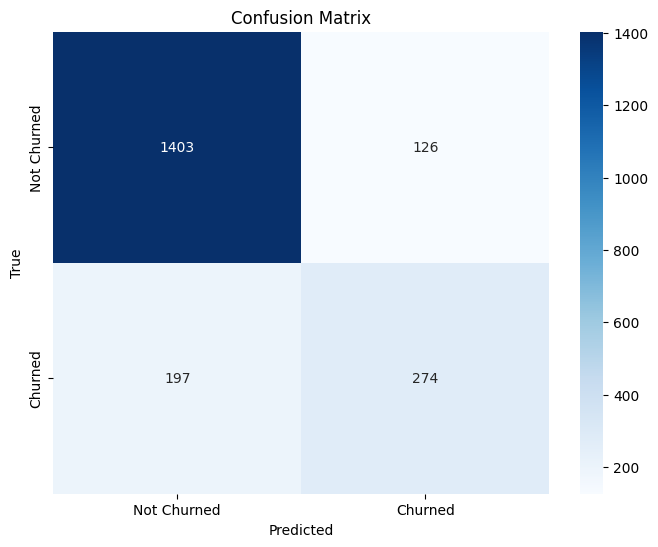

              precision    recall  f1-score   support

 Not Churned       0.88      0.92      0.90      1529
     Churned       0.69      0.58      0.63       471

    accuracy                           0.84      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.83      0.84      0.83      2000



: 

In [ ]:
# Analyze on the test set
predictions = model.predict(X_test)
predicted_classes = predictions# np.argmax(predictions, axis=1)
true_classes = y_test#np.argmax(y_test, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=['Not Churned', 'Churned']))

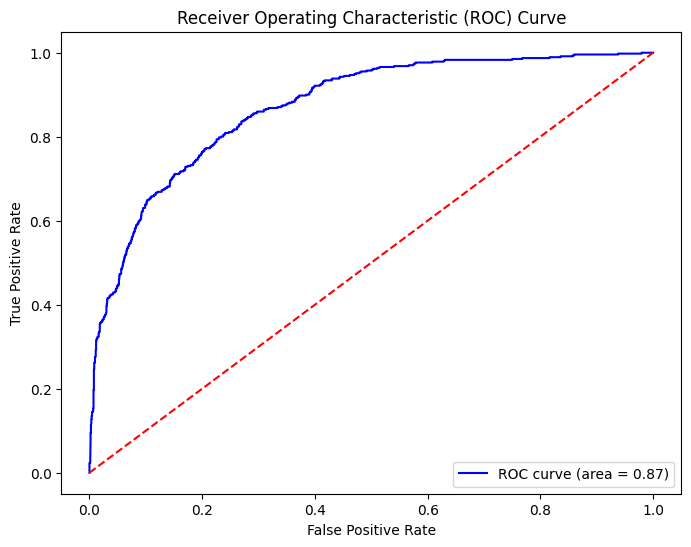

: 

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(true_classes, probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


This model performs great when compared to all other models assessed on the churn dataset. In `pca_from_scratch.ipynb`, we used PCA then logistic regression and got an 83% accuracy with 0.81 AUC score. The GBM from `ensembles_from_scratch.ipynb` approached an 87% accuracy with 0.86 AUC score. However, the 2-layer neural network, achieved similar accuracy and the AUC score improved significantly to 0.87. 

Overall, Neural Networks are one of the most powerful algorithms, but lack interpretability. Just this two-layer network has 914 parameters! Much more than the previous models.